In [3]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


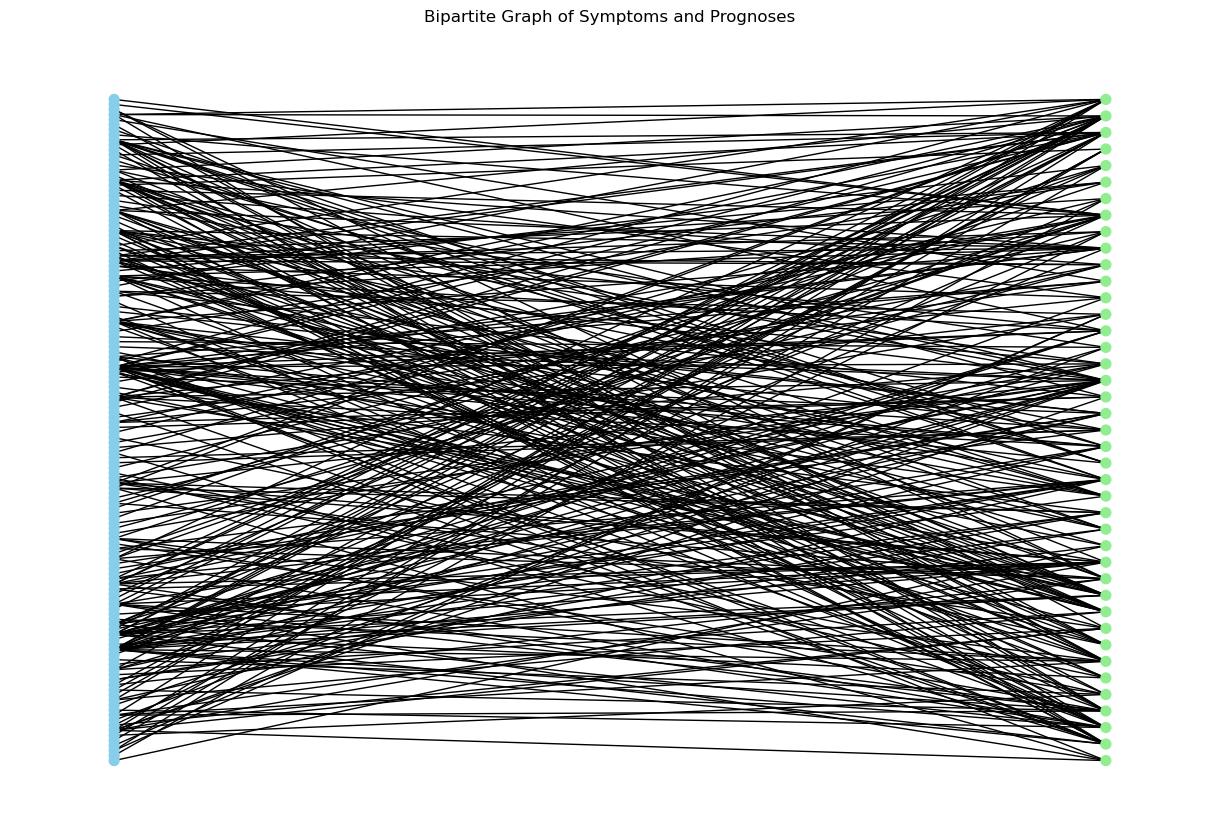

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('C:/Users/Srujana/OneDrive/Desktop/big data/dataset/training.csv')

data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

symptoms = data.columns[:-1]  
prognoses = data['prognosis'].unique()

B = nx.Graph()
B.add_nodes_from(symptoms, bipartite=0)  
B.add_nodes_from(prognoses, bipartite=1)  

for _, row in data.iterrows():
    prognosis = row['prognosis']
    for symptom in symptoms:
        if row[symptom] == 1:  
            B.add_edge(symptom, prognosis)

pos = nx.drawing.layout.bipartite_layout(B, symptoms)

plt.figure(figsize=(12, 8))
nx.draw(B, pos, with_labels=False, node_color=['skyblue' if node in symptoms else 'lightgreen' for node in B], node_size=50)
plt.title("Bipartite Graph of Symptoms and Prognoses")
plt.show()
